<a href="https://colab.research.google.com/github/ithukral/DS440/blob/main/FinalTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [ ]:

from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive/Colab Notebooks'
!pwd #Prints the present working directory

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv('sto.csv')
#
df= df.replace(',','', regex=True)

df["Open"] = df.Open.astype(float)
df["High"] = df.High.astype(float)
df["Low"] = df.Low.astype(float)
df["Close*"] = df["Close*"].astype(float)
df["Adj Close**"] = df["Adj Close**"].astype(float)
df["Volume"] = df.Volume.astype(float)
df.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume         float64
dtype: object

In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

          Date     Open     High      Low   Close*  Adj Close**        Volume
0  Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28  1.424644e+10
1  Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62  2.447590e+10
2  Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23  2.133210e+10
3  Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33  2.472847e+10
4  Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36  1.588645e+10
(1300, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


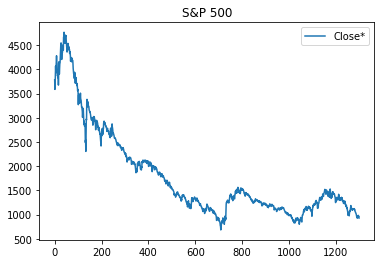

In [ ]:
df[['Close*']].plot()
plt.title("S&P 500")
plt.show()

Text(0.5, 1.0, 'S&P 500 Cumulative Returns')

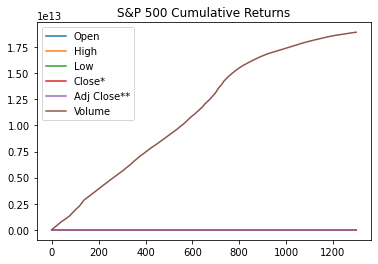

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('S&P 500 Cumulative Returns')

In [ ]:
df['Date']

0       Oct 03 2022
1       Sep 26 2022
2       Sep 19 2022
3       Sep 12 2022
4       Sep 05 2022
           ...     
1295    Dec 08 1997
1296    Dec 01 1997
1297    Nov 24 1997
1298    Nov 17 1997
1299    Nov 10 1997
Name: Date, Length: 1300, dtype: object

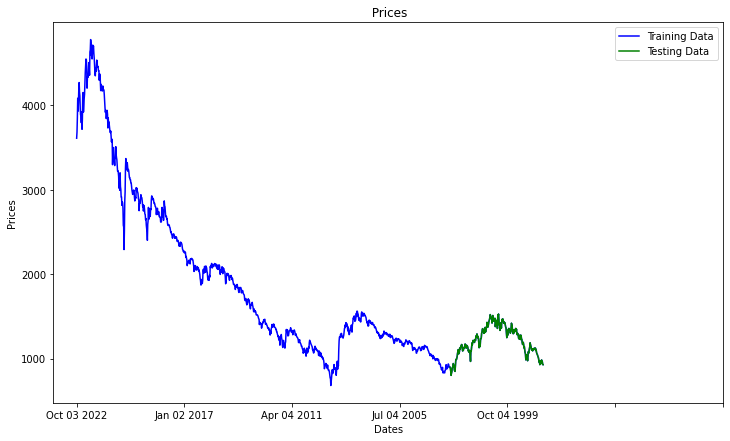

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title(' Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
#  Build Model 
model = ARIMA(history, order=(5,2,5))  
fitted = model.fit()  




# Forecast using 90% confidence interval
predictions, se, conf = fitted.forecast(260, alpha=0.1) 
fc_series = pd.Series(predictions, index=test_data.index)
#for t in range(len(test_ar)):
#    model = ARIMA(history, order=(1,1,2))
#    model_fit = model.fit()
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    obs = test_ar[t]
#    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

#We only need to make model once, the commented out approach creates model per single prediction. 
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 155079.902
Symmetric mean absolute percentage error: 32.903


In [ ]:
print(predictions[160])
print(test_data['Open'][1200])
print(test_data.index)

845.6992442814901
1282.81
RangeIndex(start=1040, stop=1300, step=1)


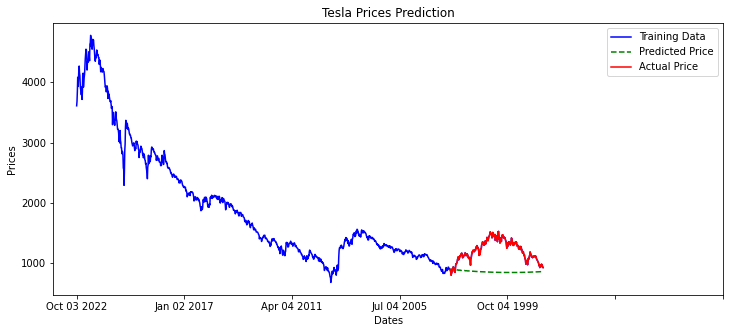

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [ ]:
print(train_data)

             Date     Open     High      Low   Close*  Adj Close**  \
0     Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   
1     Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
2     Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
3     Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
4     Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
...           ...      ...      ...      ...      ...          ...   
1035  Dec 02 2002   936.31   954.28   895.96   912.23       912.23   
1036  Nov 25 2002   930.55   941.82   912.10   936.31       936.31   
1037  Nov 18 2002   909.83   937.28   893.09   930.55       930.55   
1038  Nov 11 2002   894.74   910.21   872.05   909.83       909.83   
1039  Nov 04 2002   900.96   925.66   891.62   894.74       894.74   

            Volume  
0     1.424644e+10  
1     2.447590e+10  
2     2.133210e+10  
3     2.472847e+10  
4     1.588645e+10  
...            ...  
1035  7.1806

In [ ]:
print(test_data)

             Date    Open    High     Low  Close*  Adj Close**        Volume
1040  Oct 28 2002  897.65  907.44  867.91  900.96       900.96  7.426300e+09
1041  Oct 21 2002  884.39  902.94  873.06  897.65       897.65  7.631070e+09
1042  Oct 14 2002  835.32  886.68  828.37  884.39       884.39  7.944790e+09
1043  Oct 07 2002  800.58  843.27  768.63  835.32       835.32  9.344320e+09
1044  Sep 30 2002  827.37  851.93  794.10  800.58       800.58  8.682100e+09
...           ...     ...     ...     ...     ...          ...           ...
1295  Dec 08 1997  983.79  985.67  947.00  953.39       953.39  2.842790e+09
1296  Dec 01 1997  955.40  986.25  955.40  983.79       983.79  2.988090e+09
1297  Nov 24 1997  963.09  963.09  944.71  955.40       955.40  1.779630e+09
1298  Nov 17 1997  928.35  964.55  928.35  963.09       963.09  2.854250e+09
1299  Nov 10 1997  927.51  935.90  900.61  928.35       928.35  2.774860e+09

[260 rows x 7 columns]


In [ ]:
print(df)

             Date     Open     High      Low   Close*  Adj Close**  \
0     Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   
1     Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
2     Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
3     Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
4     Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
...           ...      ...      ...      ...      ...          ...   
1295  Dec 08 1997   983.79   985.67   947.00   953.39       953.39   
1296  Dec 01 1997   955.40   986.25   955.40   983.79       983.79   
1297  Nov 24 1997   963.09   963.09   944.71   955.40       955.40   
1298  Nov 17 1997   928.35   964.55   928.35   963.09       963.09   
1299  Nov 10 1997   927.51   935.90   900.61   928.35       928.35   

            Volume  
0     1.424644e+10  
1     2.447590e+10  
2     2.133210e+10  
3     2.472847e+10  
4     1.588645e+10  
...            ...  
1295  2.8427

In [ ]:
x= test_ar

print(x)

[ 897.65  884.39  835.32  800.58  827.37  845.39  889.81  893.92  916.07
  940.86  928.77  908.64  864.24  852.84  847.76  921.39  989.03  989.82
  989.14 1007.27 1027.53 1067.14 1083.82 1106.59 1054.99 1073.43 1076.32
 1125.17 1111.01 1122.73 1147.39 1148.7  1166.16 1164.31 1131.78 1089.84
 1104.18 1096.22 1122.2  1133.28 1127.58 1145.6  1172.51 1161.02 1144.89
 1123.09 1158.31 1139.45 1150.34 1138.65 1120.31 1087.2  1104.61 1073.48
 1091.65 1071.37 1040.94  965.8  1092.54 1085.78 1133.58 1184.93 1161.97
 1190.16 1214.35 1205.82 1210.85 1215.68 1190.59 1224.42 1225.35 1214.36
 1264.96 1260.67 1277.89 1291.96 1245.67 1266.61 1253.05 1242.98 1183.5
 1128.43 1160.33 1139.83 1150.53 1233.42 1234.18 1245.86 1301.53 1314.76
 1349.47 1354.92 1342.54 1318.32 1298.35 1320.28 1305.97 1312.15 1369.89
 1315.18 1341.77 1367.72 1365.98 1428.76 1379.58 1396.93 1374.17 1408.99
 1436.52 1448.72 1465.81 1494.5  1520.77 1506.45 1491.72 1471.84 1462.93
 1419.89 1480.19 1509.98 1478.9  1454.6  1441.48 146

In [ ]:
predictions

array([893.00150453, 892.01787671, 897.92504977, 904.07230482,
       903.6437331 , 897.10027144, 890.43259919, 889.62010858,
       894.25877922, 898.96889422, 898.49193507, 893.18559952,
       887.87006321, 887.17318587, 890.77093574, 894.34863035,
       893.82844665, 889.50705677, 885.24218227, 884.62942499,
       887.39425168, 890.09008612, 889.54433603, 886.01253818,
       882.57182047, 882.0228795 , 884.12685772, 886.13789451,
       885.58257021, 882.68460753, 879.89318559, 879.39337092,
       880.97543286, 882.45558265, 881.90300754, 879.51429746,
       877.2360408 , 876.77470519, 877.94615108, 879.01564018,
       878.47476281, 876.49579826, 874.6243825 , 874.19399828,
       875.04368873, 875.79653562, 875.2736051 , 873.62504234,
       872.07729179, 871.67270616, 872.27145289, 872.7812482 ,
       872.28046626, 870.89912188, 869.60991336, 869.22773672,
       869.63190158, 869.95628069, 869.4803446 , 868.315951  ,
       867.23427107, 866.87239157, 867.12679913, 867.31

In [ ]:
reference_test=test_data
reference_test

Date    Open    High     Low  Close*  Adj Close**        Volume
1040  Oct 28 2002  897.65  907.44  867.91  900.96       900.96  7.426300e+09
1041  Oct 21 2002  884.39  902.94  873.06  897.65       897.65  7.631070e+09
1042  Oct 14 2002  835.32  886.68  828.37  884.39       884.39  7.944790e+09
1043  Oct 07 2002  800.58  843.27  768.63  835.32       835.32  9.344320e+09
1044  Sep 30 2002  827.37  851.93  794.10  800.58       800.58  8.682100e+09
...           ...     ...     ...     ...     ...          ...           ...
1295  Dec 08 1997  983.79  985.67  947.00  953.39       953.39  2.842790e+09
1296  Dec 01 1997  955.40  986.25  955.40  983.79       983.79  2.988090e+09
1297  Nov 24 1997  963.09  963.09  944.71  955.40       955.40  1.779630e+09
1298  Nov 17 1997  928.35  964.55  928.35  963.09       963.09  2.854250e+09
1299  Nov 10 1997  927.51  935.90  900.61  928.35       928.35  2.774860e+09

[260 rows x 7 columns]

In [ ]:
reference_test=reference_test.drop('Adj Close**', axis=1)

In [ ]:
reference_test['Close*']=predictions

In [ ]:
reference_test['Adj Close**']=predictions

In [ ]:
reference_test

Date    Open    High     Low      Close*        Volume  \
1040  Oct 28 2002  897.65  907.44  867.91  893.001505  7.426300e+09   
1041  Oct 21 2002  884.39  902.94  873.06  892.017877  7.631070e+09   
1042  Oct 14 2002  835.32  886.68  828.37  897.925050  7.944790e+09   
1043  Oct 07 2002  800.58  843.27  768.63  904.072305  9.344320e+09   
1044  Sep 30 2002  827.37  851.93  794.10  903.643733  8.682100e+09   
...           ...     ...     ...     ...         ...           ...   
1295  Dec 08 1997  983.79  985.67  947.00  860.121790  2.842790e+09   
1296  Dec 01 1997  955.40  986.25  955.40  860.457835  2.988090e+09   
1297  Nov 24 1997  963.09  963.09  944.71  860.797533  1.779630e+09   
1298  Nov 17 1997  928.35  964.55  928.35  861.141216  2.854250e+09   
1299  Nov 10 1997  927.51  935.90  900.61  861.489049  2.774860e+09   

      Adj Close**  
1040   893.001505  
1041   892.017877  
1042   897.925050  
1043   904.072305  
1044   903.643733  
...           ...  
1295   860.121790  
1296   860.457835  
1297   860.797533  
1298   861.141216  
1299   861.489049  

[260 rows x 7 columns]

In [ ]:
!pip install -U scikit-multiflow
!pip install evidently

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.1 MB 5.2 MB/s 
     |████████████████████████████████| 636 kB 13.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import DataDriftTab

/usr/local/lib/python3.7/dist-packages/evidently/analyzers/__init__.py:3: UserWarning: analyzers are deprecated, use metrics instead
  warnings.warn("analyzers are deprecated, use metrics instead")
/usr/local/lib/python3.7/dist-packages/evidently/dashboard/__init__.py:8: UserWarning: dashboards are deprecated, use metrics instead
  warnings.warn("dashboards are deprecated, use metrics instead")


In [ ]:

from skmultiflow.drift_detection.adwin import ADWIN
import numpy as np
import pandas as pd
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab
#from evidently.dashboard.tabs import DataDriftTab, CatTargetDriftTab

In [ ]:
verbose= False
old_dataset=df
new_data=train_data
new_data=new_data.append(reference_test)



In [ ]:
stocks_data_drift_report = Dashboard(tabs=[DataDriftTab(verbose_level=verbose)])
stocks_data_drift_report.calculate(reference_test, test_data)
stocks_data_drift_report.show()

In [ ]:
old_dataset

Date     Open     High      Low   Close*  Adj Close**  \
0     Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   
1     Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
2     Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
3     Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
4     Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
...           ...      ...      ...      ...      ...          ...   
1295  Dec 08 1997   983.79   985.67   947.00   953.39       953.39   
1296  Dec 01 1997   955.40   986.25   955.40   983.79       983.79   
1297  Nov 24 1997   963.09   963.09   944.71   955.40       955.40   
1298  Nov 17 1997   928.35   964.55   928.35   963.09       963.09   
1299  Nov 10 1997   927.51   935.90   900.61   928.35       928.35   

            Volume  
0     1.424644e+10  
1     2.447590e+10  
2     2.133210e+10  
3     2.472847e+10  
4     1.588645e+10  
...            ...  
1295  2.842790e+09  
1296  2.988090e+09  
1297  1.779630e+09  
1298  2.854250e+09  
1299  2.774860e+09  

[1300 rows x 7 columns]

In [ ]:
new_data

Date     Open     High      Low   Close*  Adj Close**  \
0     Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28   
1     Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62   
2     Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23   
3     Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33   
4     Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36   
...           ...      ...      ...      ...      ...          ...   
1295  Dec 08 1997   983.79   985.67   947.00   983.79       983.79   
1296  Dec 01 1997   955.40   986.25   955.40   955.40       955.40   
1297  Nov 24 1997   963.09   963.09   944.71   963.09       963.09   
1298  Nov 17 1997   928.35   964.55   928.35   928.35       928.35   
1299  Nov 10 1997   927.51   935.90   900.61   927.51       927.51   

            Volume  
0     1.424644e+10  
1     2.447590e+10  
2     2.133210e+10  
3     2.472847e+10  
4     1.588645e+10  
...            ...  
1295  2.842790e+09  
1296  2.988090e+09  
1297  1.779630e+09  
1298  2.854250e+09  
1299  2.774860e+09  

[1300 rows x 7 columns]